In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
milk_production = pd.read_csv('./datasets/milk_production.csv', 
                    index_col='date',
                    parse_dates=True)
milk_production

,pounds_per_cow
date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


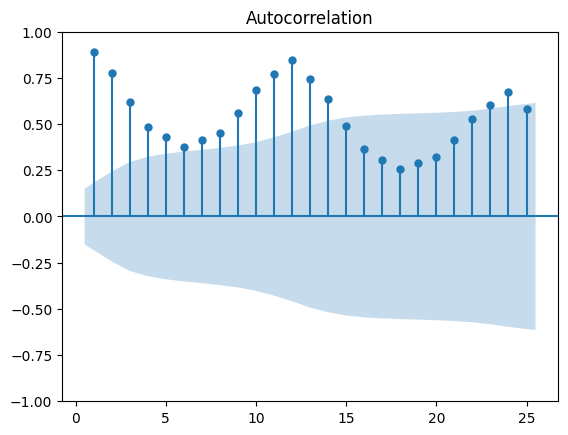

In [5]:
# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(milk_production['pounds_per_cow'], lags=25, zero=False,  ax=ax1)

# Show figure
plt.show()

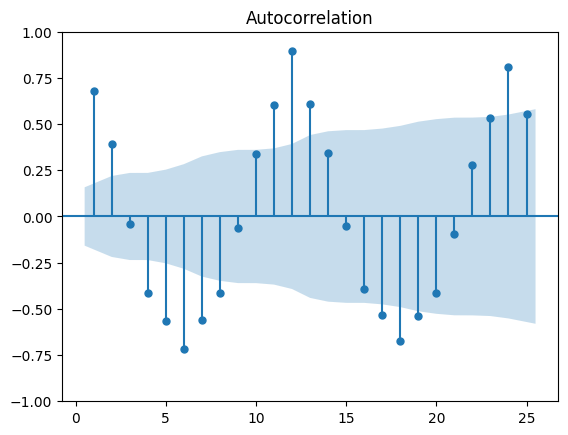

In [6]:
# Subtract the rolling mean
milk_production_2 = milk_production - milk_production.rolling(15).mean()

# Drop the NaN values
milk_production_2 = milk_production_2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(milk_production_2['pounds_per_cow'], lags=25, zero=False, ax=ax1)

# Show figure
plt.show()

In [7]:
# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [8]:
# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMA model
model = SARIMAX(milk_production, order=(1,0,0), seasonal_order=(1,1,0,7))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                    pounds_per_cow   No. Observations:                  168
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                -847.290
Date:                           Tue, 25 Apr 2023   AIC                           1700.580
Time:                                   22:50:07   BIC                           1709.824
Sample:                               01-01-1962   HQIC                          1704.334
                                    - 12-01-1975                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7305      0.067     10.942      0.000       0.600       0.861
ar.S.L7       -0.6746      0.090     -7.504

C:\Users\easyb\Anaconda3\envs\pythonic\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\easyb\Anaconda3\envs\pythonic\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [10]:
# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMA model
model = SARIMAX(milk_production, order=(2,1,1), seasonal_order=(1,0,0,4))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                     pounds_per_cow   No. Observations:                  168
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 4)   Log Likelihood                -857.083
Date:                            Tue, 25 Apr 2023   AIC                           1724.167
Time:                                    22:50:42   BIC                           1739.757
Sample:                                01-01-1962   HQIC                          1730.494
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1909      0.353     -0.540      0.589      -0.883       0.501
ar.L2          0.2324      0.087   

C:\Users\easyb\Anaconda3\envs\pythonic\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\easyb\Anaconda3\envs\pythonic\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [11]:
# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMA model
model = SARIMAX(milk_production, order=(1,1,0), seasonal_order=(0,1,1,12))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                       pounds_per_cow   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -530.104
Date:                              Tue, 25 Apr 2023   AIC                           1066.207
Time:                                      22:51:03   BIC                           1075.337
Sample:                                  01-01-1962   HQIC                          1069.916
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2253      0.077     -2.925      0.003      -0.376      -0.074
ma.S.L12      -0.61

C:\Users\easyb\Anaconda3\envs\pythonic\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\easyb\Anaconda3\envs\pythonic\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [16]:
# Create ARIMA(2,1,2) model
arima = ARIMA(milk_production, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

1976-01-01    846.039318
1976-02-01    846.976336
1976-03-01    845.293919
1976-04-01    845.418477
1976-05-01    846.139886
1976-06-01    845.848068
1976-07-01    845.616526
1976-08-01    845.824259
1976-09-01    845.861352
1976-10-01    845.755155
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\easyb\Anaconda3\envs\pythonic\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\easyb\Anaconda3\envs\pythonic\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\easyb\Anaconda3\envs\pythonic\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [12]:
# Take the first and seasonal differences and drop NaNs
milk_production_diff = milk_production.diff().diff(12).dropna()

C:\Users\easyb\Anaconda3\envs\pythonic\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


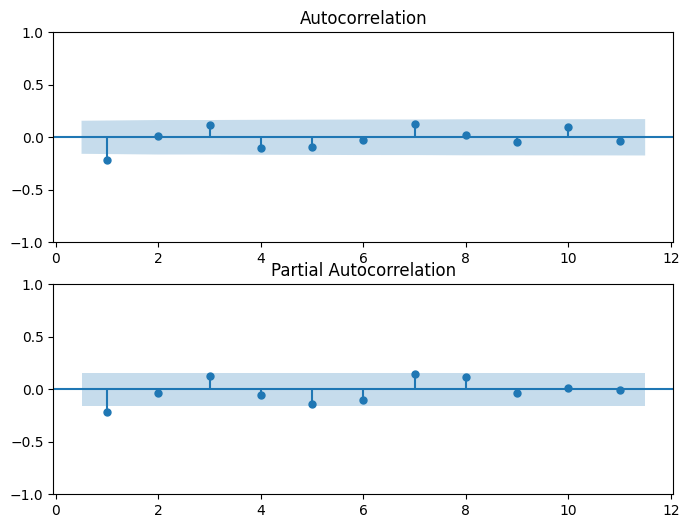

In [13]:
# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(milk_production_diff, lags=11, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(milk_production_diff, lags=11, zero=False, ax=ax2)

plt.show()

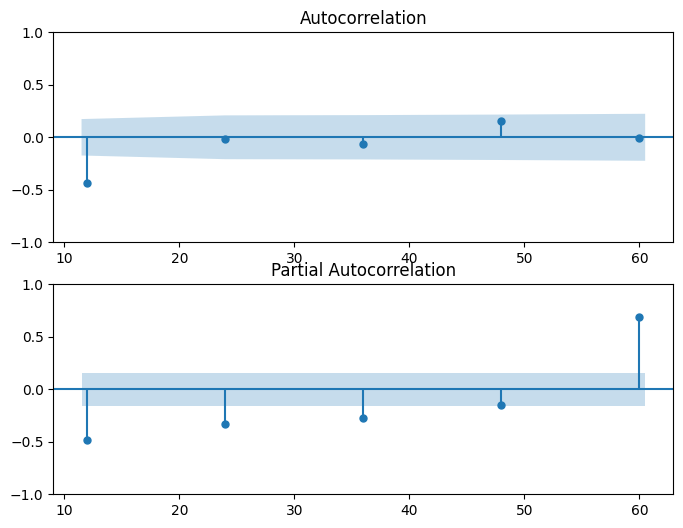

In [14]:
# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(milk_production_diff, lags=lags, ax=ax1)

# Plot the PACF on ax2
plot_pacf(milk_production_diff, lags=lags, ax=ax2)

plt.show()